In [25]:
## animate Electric field  

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import os
from ReadBinary import *

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

fileSuffix = "-rot=0-fp=1-gamma=1-pitch=124-fwhmToPitch=0.300000012-swithTime=0.100000001-displacementFactor=0.5-res=50"
folder = "../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/"

filename_E = folder+"E-x{}.data".format(fileSuffix)
filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
filename_pml_r = folder+"pml-r-E-x{}.data".format(fileSuffix)
filename_pml_l = folder+"pml-l-E-x{}.data".format(fileSuffix)
arrayInfo = GetArrayInfo(filename_E)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
print("E shape: ", E.shape)

E_pml_r = None
E_pml_l = None
if os.path.exists(filename_pml_r):
    E_pml_r = GetArrays(filename_pml_r, indStart=0, indEnd=None)[:, 0, :, :]
if os.path.exists(filename_pml_l):
    E_pml_l = GetArrays(filename_pml_l, indStart=0, indEnd=None)[:, 0, :, :]

assert E.shape == Wp2.shape

shape = E.shape[1:]
print("Max E: ", np.max(np.abs(E)))

plt.imshow(np.real(Wp2[-1, :,:]), cmap="rainbow", origin='lower', aspect='auto')
plt.show()

animate = True
save_animation = False

if animate:
    def animate_E(n):
        #E_n = np.concatenate((E_pml_l[n, :,:-1], E[n, :,:-1], E_pml_r[n, :,:]), axis=1)
        E_n = E[n, :,:-1]
        plt.clf()
        fig = plt.imshow(np.real(E_n), cmap="rainbow", origin='lower', aspect='auto')
        plt.colorbar()
        plt.contour(np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xticks([])
        plt.yticks([])
        plt.pause(0.2)
        
        return fig
    
    if not save_animation:
        plt.ion()
        plt.figure(figsize=(7,6*(shape[0]/shape[1])))

        for n in range(E.shape[0]):
            animate_E(n)
    else:
        fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
        anim.save(folder + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)


Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 600, 590)
numOfArrays:  97


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


E shape:  (97, 600, 590)
Max E:  1.6739092


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape:  (4169, 600, 1)


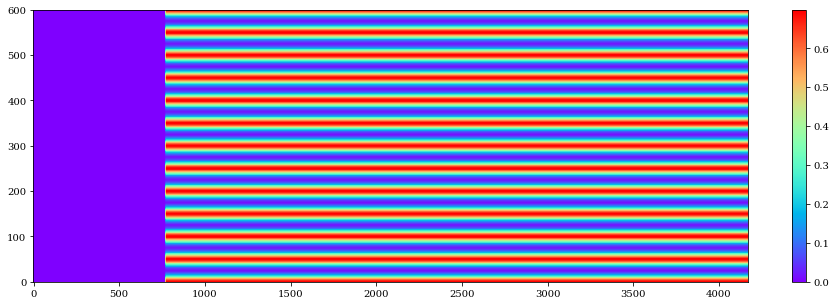

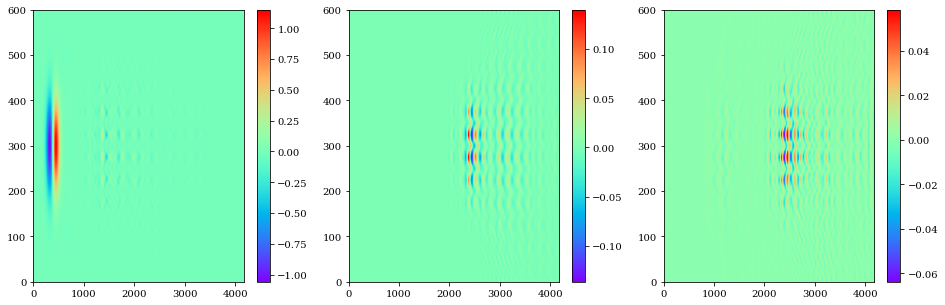

ind_t_start :  2016


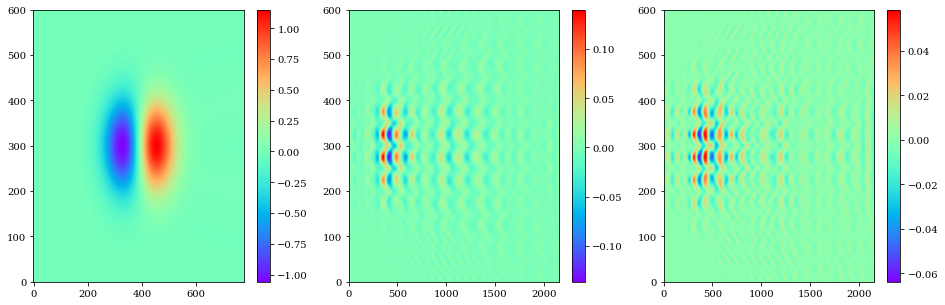

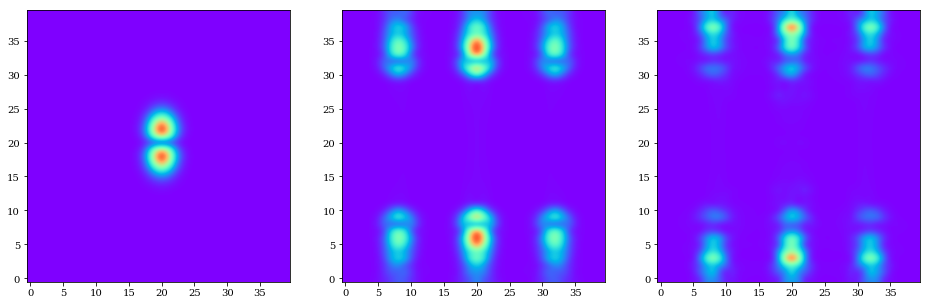

In [30]:
%pylab inline

figsize(16, 5)

wp2 = GetArrays(folder+"Wp2-slice-x{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Ei = GetArrays(folder+"Ei-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Et = GetArrays(folder+"Et-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
Er = GetArrays(folder+"Er-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", Et.shape)


shape = Et.shape[1:]
wp2_ty = wp2[:, :, 0]
wp2_t = np.sum(wp2_ty, axis=1)
ind_switch = np.argmax(wp2_t)
Ei_ty = Ei[:, :, 0]
Et_ty = Et[:, :, 0]
Er_ty = Er[:, :, 0]

plt.imshow(np.real(wp2_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

plt.subplot(131)
plt.imshow(np.real(Ei_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(132)
plt.imshow(np.real(Et_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(133)
plt.imshow(np.real(Er_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

ind_t_start = np.argmax(np.abs(np.sum(Et_ty, axis=1)) > 0.1*np.max(np.abs(np.sum(Et_ty, axis=1))))
print("ind_t_start : ", ind_t_start)

N_pts = 20
Ei_ty_chopped = Ei_ty[:ind_switch, :]
Et_ty_chopped = Et_ty[ind_t_start:, :]
Er_ty_chopped = Er_ty[ind_t_start:, :]

plt.subplot(131)
plt.imshow(np.real(Ei_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(132)
plt.imshow(np.real(Et_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.subplot(133)
plt.imshow(np.real(Er_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()


Nt_i, Ny = Ei_ty_chopped.shape
Nt_tr = Et_ty_chopped.shape[0]
Ei_f_ty = np.fft.fftshift(np.fft.fft2(Ei_ty_chopped))[Nt_i//2-N_pts:Nt_i//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
Et_f_ty = np.fft.fftshift(np.fft.fft2(Et_ty_chopped))[Nt_tr//2-N_pts:Nt_tr//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]
Er_f_ty = np.fft.fftshift(np.fft.fft2(Er_ty_chopped))[Nt_tr//2-N_pts:Nt_tr//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]

interpolation="bicubic"
plt.subplot(131)
plt.imshow(np.abs(Ei_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
plt.subplot(132)
plt.imshow(np.abs(Et_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
plt.subplot(133)
plt.imshow(np.abs(Er_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation)
plt.show()


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


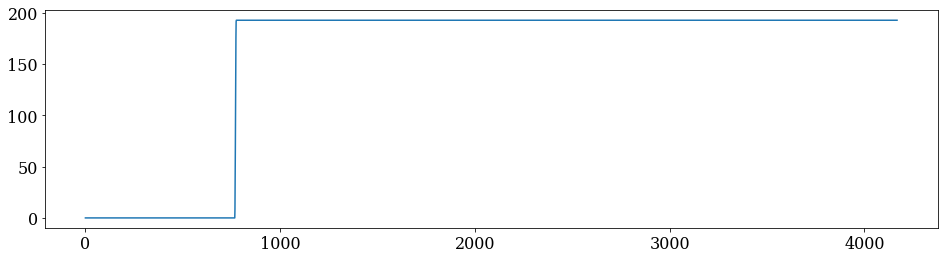

ind_switch :  775


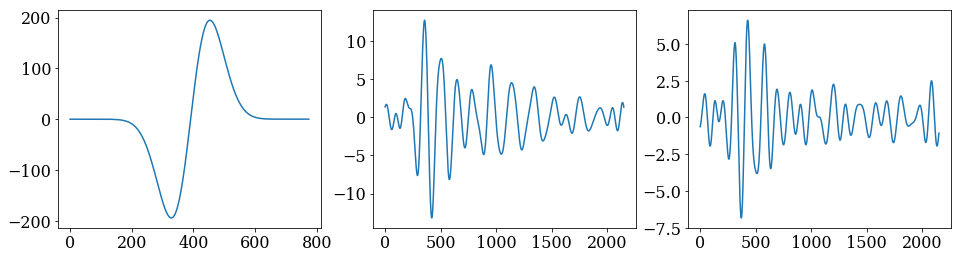

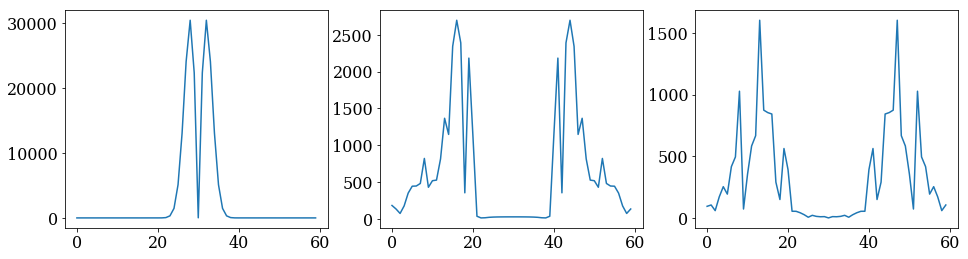

In [31]:
%pylab inline

font = {'family' : 'serif', 'weight' : 'normal', 'size' : 16}
matplotlib.rc('font', **font)

figsize(16, 4)


wp2_t = np.sum(wp2_ty, axis=1)#[600:650]
plt.plot(wp2_t)
plt.show()

ind_switch = np.argmax(wp2_t)

print("ind_switch : ", ind_switch)

plt.subplot(131)
Ei_t = np.sum(Ei_ty, axis=1)[:ind_switch]
plt.plot(Ei_t)
plt.subplot(132)
Et_t = np.sum(Et_ty, axis=1)[ind_t_start:]
plt.plot(Et_t)
plt.subplot(133)
Er_t = np.sum(Er_ty, axis=1)[ind_t_start:]
plt.plot(Er_t)
plt.show()

N_pts = 30

Nt = len(Ei_t)
plt.subplot(131)
Ei_f_t = np.fft.fftshift(np.fft.fft(Ei_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Ei_f_t))
Nt = len(Et_t)
plt.subplot(132)
Et_f_t = np.fft.fftshift(np.fft.fft(Et_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Et_f_t))
plt.subplot(133)
Er_f_t = np.fft.fftshift(np.fft.fft(Er_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(Er_f_t))
plt.show()


nameLen:  2
name:  dt
nameLen:  2
name:  dy
nameLen:  2
name:  dz
nameLen:  14
name:  unit_length_si
nameLen:  19
name:  pitch_to_unitlength
nameLen:  13
name:  fwhm_to_pitch
nameLen:  9
name:  wp_2p_thz
nameLen:  9
name:  gamma_thz
nameLen:  12
name:  wp_switch_dt
nameLen:  24
name:  EorWp_entire_sample_rate
nameLen:  11
name:  er_z_record
nameLen:  11
name:  et_z_record
nameLen:  9
name:  theta_deg
dt :  0.013435029424726963
unitLength :  0.00012399999832268804


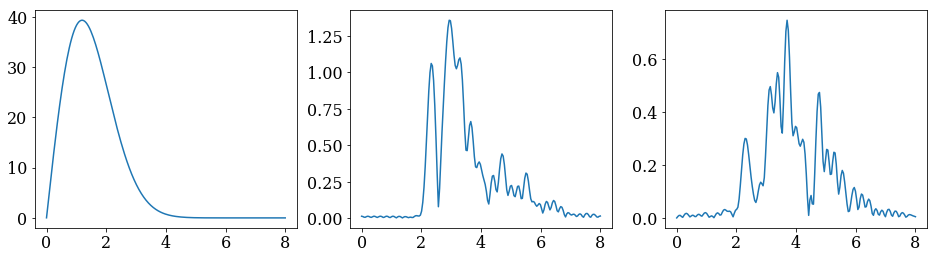

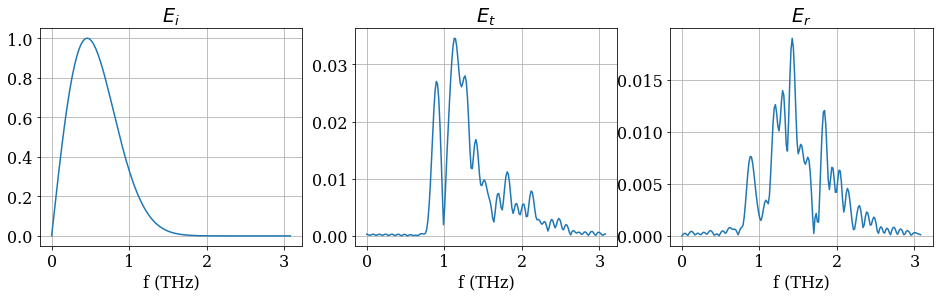

In [34]:

import struct

def ReadParams(fileSuffix):
    import struct

    filename_params = folder+"params{}.param".format(fileSuffix)
    paramfile = open(filename_params, mode='rb')
    paramsfileContent = paramfile.read()
    paramfile.close()
    ind_st = 0
    params = {}
    while ind_st < len(paramsfileContent):
        dsize = 0
        dtype = (struct.unpack("c", paramsfileContent[ind_st:ind_st+1])[0]).decode("utf-8") 
        dcode = None
        if dtype=='f':
            dsize = 4
            dcode = 'f'
        if dtype=='u':
            dsize = 8
            dcode = 'Q'

        #print('dtype: ', dtype)
        assert dsize > 0 and dcode != None
        ind_data = ind_st + 1
        data_i = struct.unpack(dcode, paramsfileContent[ind_data: ind_data + dsize])[0]
        ind_st += dsize + 1
        
        nameLenSize = 8
        nameLen = struct.unpack("Q", paramsfileContent[ind_st:ind_st+nameLenSize])[0]
        print('nameLen: ', nameLen)
        ind_st += nameLenSize
        
        name = (struct.unpack("{}s".format(nameLen), paramsfileContent[ind_st:ind_st+nameLen])[0]).decode('utf-8')
        print('name: ', name)
        ind_st += nameLen
        
        params[name] = data_i
        
    return params

params = ReadParams(fileSuffix)

dt = params['dt']
print('dt : ', dt)

unitLength = params['unit_length_si']
print('unitLength : ', unitLength)


def Get_Temporal_Spectrum(E_t, w_max=8.0, Nw=200):
    w = np.linspace(0, w_max, Nw)

    Nt = len(E_t)
    t = np.linspace(0, Nt*dt, Nt)

    E_f = np.zeros(Nw, dtype=complex)

    for i in range(len(w)):
        w_i = w[i]
        E_f[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt
    return w, E_f

plt.subplot(131)
w, Ei_f = Get_Temporal_Spectrum(Ei_t)
plot(w, np.abs(Ei_f))
plt.subplot(132)
w, Et_f = Get_Temporal_Spectrum(Et_t)
plot(w, np.abs(Et_f))
plt.subplot(133)
w, Er_f = Get_Temporal_Spectrum(Er_t)
plot(w, np.abs(Er_f))
show()

Ei_f_max = np.max(np.abs(Ei_f))

from scipy import constants
pitch = 124
plt.subplot(131)
plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Ei_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_i$')
grid()
plt.subplot(132)
plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Et_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_t$')
grid()
plt.subplot(133)
plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Er_f)/Ei_f_max)
xlabel('f (THz)')
title('$E_r$')
grid()
savefig(folder + 'E-irt-spectrum.png', bbox_inches='tight', pad_inches=0.5)
show()


In [3]:
%pylab tk

import matplotlib
#matplotlib.use("Agg")  ## should be called before importing pylab or pyplot

import numpy as np
from scipy import constants
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import os
from ReadBinary import *


font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

folder = "../data/LargePeriodicLattice-GaussianPlasma-TimeSwitched/"

fileList = os.listdir(folder)
resolution = 50

fileList = [name for name in fileList if name.endswith("res={}.param".format(resolution))]
print(fileList)
fileSuffixes = [name[6:-6] for name in fileList]
print(fileSuffixes)

def ReadParams(fileSuffix):
    import struct

    filename_params = folder+"params{}.param".format(fileSuffix)
    return ReadParamsFile(filename_params)


def MakeFolder(fileSuffix):
    params = ReadParams(fileSuffix)
    pitch = params['pitch_to_unitlength']*params['unit_length_si']/constants.micro
    fwhm_to_pitch = params['fwhm_to_pitch']
    fp_thz = params['wp_2p_thz']
    switch_time = params['wp_switch_dt']/(constants.c/params['unit_length_si'])/constants.pico
    theta_deg = params['theta_deg']
    centered_TF = True
    f_in = '/rot={:.1f}deg, fp={:.2f}thz, pitch={:.3f}um, fwhmToPitch={:.2f}, SwitchTime={:.2f}ps'.format(theta_deg, fp_thz, pitch, fwhm_to_pitch, switch_time)
    if params['celldisplacement_to_pitch']==0.0:
        f_in += ", centered"
    folder_i = folder + 'resolution={}'.format(resolution) + f_in
    if not os.path.exists(folder_i):
        os.makedirs(folder_i)
    return folder_i + '/'
        

def SaveAnimatedField1(fileSuffix):
    params = ReadParams(fileSuffix)
    folder_i = MakeFolder(fileSuffix)
    dt_ps = params['dt']/(constants.c/params['unit_length_si'])/constants.pico
    dy_um = params['dy']*params['unit_length_si']/constants.micro
    dz_um = params['dz']*params['unit_length_si']/constants.micro
    
    filename_E = folder+"E-x{}.data".format(fileSuffix)
    filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
    arrayInfo = GetArrayInfo(filename_E)

    E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
    Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
    shape = E.shape[1:]
    
    y_max_um = shape[0]//2*dy_um
    z_max_um = shape[1]//2*dz_um

    plt.imshow(np.real(Wp2[-1, :,:])/np.max(np.abs(Wp2[-1, :,:])), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
    plt.colorbar()
    plt.xlabel(r'$z (\mu m)$')
    plt.ylabel(r'$y (\mu m)$')
    plt.savefig(folder_i + 'plasma.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

    def animate_E(n):
        plt.clf()
        fig = plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
        plt.colorbar()
        y = np.linspace(-y_max_um, y_max_um, shape[0])
        z = np.linspace(-z_max_um, z_max_um, shape[1])
        Z, Y = np.meshgrid(z, y, indexing='xy')
        plt.contour(Z, Y, np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xlabel(r'$z (\mu m)$')
        plt.ylabel(r'$y (\mu m)$')
        plt.title(r't = {:.3f} ps'.format(n*dt_ps*params['EorWp_entire_sample_rate']))
        plt.pause(0.05)
        
        return fig
    
    fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
    anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
    anim.save(folder_i + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)

def SaveAnimatedField2(fileSuffix):
    folder_i = MakeFolder(fileSuffix)

    filename_E = folder+"E-x{}.data".format(fileSuffix)
    filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
    arrayInfo = GetArrayInfo(filename_E)
    
    
    E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
    Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
    shape = E.shape[1:]

    fig = plt.figure(figsize=(6,6))
    cb = None

    ims = []
    for n in np.arange(E.shape[0]):
        ax = plt.imshow(E[n,:,:], cmap="rainbow", origin='lower', aspect='auto')
        if n==0:
            cb = plt.colorbar(ax)
        else:
            cb.update_normal(ax)
        plt.contour(np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xticks([])
        plt.yticks([])
        ims.append((ax,))

    print('{} images added.'.format(E.shape[0]))
    im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000, blit=False)

    im_ani.save(folder_i + 'Efield-anim.mp4', writer='ffmpeg')
    plt.close(fig)

def SaveAnimatedField3(fileSuffix):
    params = ReadParams(fileSuffix)
    folder_i = MakeFolder(fileSuffix)
    dt_ps = params['dt']/(constants.c/params['unit_length_si'])/constants.pico
    dy_um = params['dy']*params['unit_length_si']/constants.micro
    dz_um = params['dz']*params['unit_length_si']/constants.micro
    
    filename_E = folder+"E-x{}.data".format(fileSuffix)
    filename_Wp2 = folder+"Wp2-x{}.data".format(fileSuffix)
    arrayInfo = GetArrayInfo(filename_E)

    E = GetArrays(filename_E, indStart=0, indEnd=None)[:, 0, :, :]
    Wp2 = GetArrays(filename_Wp2, indStart=0, indEnd=None)[:, 0, :, :]
    shape = E.shape[1:]
    
    y_max_um = shape[0]//2*dy_um
    z_max_um = shape[1]//2*dz_um
    
    plt.rcParams["figure.figsize"] = [7,6*(shape[0]/shape[1])]
    
    plt.imshow(np.real(Wp2[-1, :,:])/np.max(np.abs(Wp2[-1, :,:])), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
    plt.colorbar()
    plt.xlabel(r'$z (\mu m)$')
    plt.ylabel(r'$y (\mu m)$')
    plt.savefig(folder_i + 'plasma.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

    folder_temp = folder_i + "temp/"
    if not os.path.exists(folder_temp):
        os.makedirs(folder_temp)
    
    for n in range(E.shape[0]):
        #plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        #plt.clf()
        plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto', extent=[-z_max_um, z_max_um, -y_max_um, y_max_um])
        plt.colorbar()
        y = np.linspace(-y_max_um, y_max_um, shape[0])
        z = np.linspace(-z_max_um, z_max_um, shape[1])
        Z, Y = np.meshgrid(z, y, indexing='xy')
        plt.contour(Z, Y, np.real(Wp2[n, :,:]), cmap="Greys", linewidths=0.5)
        plt.xlabel(r'$z (\mu m)$')
        plt.ylabel(r'$y (\mu m)$')
        plt.title(r't = {:.3f} ps'.format(n*dt_ps*params['EorWp_entire_sample_rate']))
        plt.savefig(folder_temp + 'img{:04d}.png'.format(n + 1), bbox_inches='tight', pad_inches=0.5)
        plt.close('all')


    import subprocess
    out = subprocess.run(["ffmpeg", "-y", "-r", "15", "-f", "image2", "-s", "800x600", \
                          "-i", folder_temp+"img%04d.png", \
                          "-vcodec", "libx264", "-crf", "24",  "-pix_fmt", "yuv420p", \
                          "-vf", 'pad=ceil(iw/2)*2:ceil(ih/2)*2', folder_temp+"test.mp4"], stdout=subprocess.PIPE, check=True)
    print("ffmpeg: ", out)


def SaveFieldAndSpectrum(fileSuffix):
    folder_i = MakeFolder(fileSuffix)
    params = ReadParams(fileSuffix)
    unitLength = params['unit_length_si']
    unitTime = unitLength/constants.c
    dt_ps = params['dt']*unitTime/constants.pico
    dy_um = params['dy']*unitLength/constants.micro


    wp2 = GetArrays(folder+"Wp2-slice-x{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    Ei = GetArrays(folder+"Ei-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    Et = GetArrays(folder+"Et-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    Er = GetArrays(folder+"Er-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
    print("shape: ", Et.shape)

    shape = Et.shape[1:]
    wp2_ty = wp2[:, :, 0]
    wp2_t = np.sum(wp2_ty, axis=1)
    ind_switch = np.argmax(wp2_t)
    Ei_ty = Ei[:, :, 0]
    Et_ty = Et[:, :, 0]
    Er_ty = Er[:, :, 0]
    ind_t_start = np.argmax(np.abs(np.sum(Et_ty, axis=1)) > 0.1*np.max(np.abs(np.sum(Et_ty, axis=1))))
    print("ind_t_start : ", ind_t_start)

    Ei_ty_chopped = Ei_ty[:ind_switch, :]
    Et_ty_chopped = Et_ty[ind_t_start:, :]
    Er_ty_chopped = Er_ty[ind_t_start:, :]

    #plt.figure(figsize=(16, 5))
    plt.rcParams["figure.figsize"] = [17, 5]
    plt.subplot(131)
    t_extent = Ei_ty_chopped.shape[0]*dt_ps
    y_extent = Ei_ty_chopped.shape[1]*dy_um
    plt.imshow(np.real(Ei_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
    plt.colorbar()
    plt.title(r'$E^I$')
    plt.xlabel(r't (ps)')
    plt.ylabel(r'$y (\mu m)$')
    plt.subplot(132)
    t_extent = Et_ty_chopped.shape[0]*dt_ps
    plt.imshow(np.real(Et_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
    plt.colorbar()
    plt.title(r'$E^T$')
    plt.xlabel(r't (ps)')
    plt.yticks([])
    plt.subplot(133)
    t_extent = Er_ty_chopped.shape[0]*dt_ps
    plt.imshow(np.real(Er_ty_chopped).T, cmap="rainbow", origin='lower', aspect='auto', extent=[0.0, t_extent, 0.0, y_extent])
    plt.colorbar()
    plt.title(r'$E^R$')
    plt.xlabel(r't (ps)')
    plt.yticks([])
    plt.savefig(folder_i + 'E-irt.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

    dt = dt_ps*constants.pico
    dy = dy_um*constants.micro
    Nt_i, Ny = Ei_ty_chopped.shape
    df_i = 1/(Nt_i*dt)   ## SI
    f_max_thz = 2.0
    N_pts_t_i = int(f_max_thz*constants.tera / df_i)
    
    dk_i = 2.0*np.pi/(Ny*dy)    ## dk
    k_silicon = 2.0*np.pi*(1.0*constants.tera)/(constants.c/np.sqrt(11.7))
    k_max_norm = 1.0    ## at the maximum of the incident spectrum (here f=1thz) k would be 1.0
    k_max = k_max_norm*k_silicon
    N_pts_y = int(k_max / dk_i)
    Ei_f_ty = np.fft.fftshift(np.fft.fft2(Ei_ty_chopped))/((2*np.pi)**2*Nt_i*Ny)
    Ei_f_ty = Ei_f_ty[Nt_i//2-N_pts_t_i:Nt_i//2+N_pts_t_i, Ny//2-N_pts_y:Ny//2+N_pts_y]
    
    print('N_pts_t_i : ', N_pts_t_i)
    print('N_pts_y : ', N_pts_y)
    
    Nt_tr = Et_ty_chopped.shape[0]
    df_tr = 1/(Nt_tr*dt)
    N_pts_tr = int(f_max_thz*constants.tera / df_tr)
    
    
    Et_f_ty = np.fft.fftshift(np.fft.fft2(Et_ty_chopped))/((2*np.pi)**2*Nt_tr*Ny)
    Et_f_ty = Et_f_ty[Nt_tr//2-N_pts_tr:Nt_tr//2+N_pts_tr, Ny//2-N_pts_y:Ny//2+N_pts_y]
    
    Er_f_ty = np.fft.fftshift(np.fft.fft2(Er_ty_chopped))/((2*np.pi)**2*Nt_tr*Ny)
    Er_f_ty = Er_f_ty[Nt_tr//2-N_pts_tr:Nt_tr//2+N_pts_tr, Ny//2-N_pts_y:Ny//2+N_pts_y]
    
    Ei_f_ty_max = np.max(np.abs(Ei_f_ty))
    Ei_f_ty /= Ei_f_ty_max
    Er_f_ty /= Ei_f_ty_max
    Et_f_ty /= Ei_f_ty_max

    
    interpolation="bicubic"
    #plt.figure(figsize=(16, 5))
    plt.rcParams["figure.figsize"] = [16, 5]
    plt.subplot(131)
    plt.imshow(np.abs(Ei_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation,\
               extent=[-k_max_norm, k_max_norm, -f_max_thz, f_max_thz])
    plt.colorbar()
    plt.title(r'$E^I$')
    plt.xlabel(r'$k_y / [k_0^{si}(@ 1thz)]$')
    plt.ylabel(r'$f  (THz)$')
    plt.subplot(132)
    plt.imshow(np.abs(Et_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation,\
               extent=[-k_max_norm, k_max_norm, -f_max_thz, f_max_thz])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(r'$k_y / [k_0^{si}(@ 1thz)]$')
    plt.subplot(133)
    plt.imshow(np.abs(Er_f_ty), cmap="rainbow", origin='lower', aspect='auto', interpolation=interpolation,\
               extent=[-k_max_norm, k_max_norm, -f_max_thz, f_max_thz])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(r'$k_y / [k_0^{si}(@ 1thz)]$')
    plt.savefig(folder_i + 'E-irt-spectrum.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')
        
    def Get_Temporal_Spectrum(E_t, w_max=6.0, Nw=200):
        w = np.linspace(0, w_max, Nw)

        Nt = len(E_t)
        t = np.linspace(0, Nt*params['dt'], Nt)

        E_f = np.zeros(Nw, dtype=complex)

        for i in range(len(w)):
            w_i = w[i]
            E_f[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt
        return w, E_f

    Ei_t = np.sum(Ei_ty_chopped, axis=1)/Ei_ty_chopped.shape[1]
    Et_t = np.sum(Et_ty_chopped, axis=1)/Et_ty_chopped.shape[1]
    Er_t = np.sum(Er_ty_chopped, axis=1)/Er_ty_chopped.shape[1]
    
    w, Ei_f = Get_Temporal_Spectrum(Ei_t)
    w, Et_f = Get_Temporal_Spectrum(Et_t)
    w, Er_f = Get_Temporal_Spectrum(Er_t)

    Ei_f_max = np.max(np.abs(Ei_f))

    #pitch = params['pitch_to_unitlength']*unitLength/constants.micro
    plt.subplot(131)
    plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Ei_f)/Ei_f_max)
    plt.xlabel('f (THz)')
    plt.title('$E^I$')
    plt.grid()
    plt.subplot(132)
    plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Et_f)/Ei_f_max)
    plt.xlabel('f (THz)')
    plt.title('$E^T$')
    plt.grid()
    plt.subplot(133)
    plt.plot(w*(constants.c/(unitLength))/constants.tera/(2.0*np.pi), np.abs(Er_f)/Ei_f_max)
    plt.xlabel('f (THz)')
    plt.title('$E^R$')
    plt.grid()
    plt.savefig(folder_i + 'E-irt-spectrum_ky=0.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

    #plt.figure(figsize=(10, 5))
    plt.rcParams["figure.figsize"] = [10, 5]
    wp2_t = np.sum(wp2_ty, axis=1)
    wp2_t /= np.max(np.abs(wp2_t))
    Ei_t = np.sum(Ei_ty_chopped, axis=1)
    Ei_t /= np.max(np.abs(Ei_t))
    t_minToMax_ps = np.abs(np.argmax(Ei_t) - np.argmin(Ei_t))*dt_ps
    plt.plot(np.arange(len(wp2_t))*dt_ps, wp2_t)
    plt.plot(np.arange(len(Ei_t))*dt_ps, Ei_t)
    plt.xlabel(r'$t (ps)$')
    plt.title(r'$E^I$ (red) vs switch time (blue), amplitudes normalized')
    plt.savefig(folder_i + 'switchtime.png', bbox_inches='tight', pad_inches=0.5)
    plt.close('all')

for i in range(len(fileSuffixes)):
    SaveAnimatedField1(fileSuffixes[i])
    plt.close('all')
    SaveFieldAndSpectrum(fileSuffixes[i])
    print("{}/{} done! {}".format(i, len(fileSuffixes), fileSuffixes[i]))
plt.close('all')

Populating the interactive namespace from numpy and matplotlib
['params-rot=0-fp=1-gamma=1-pitch=124-fwhmToPitch=0.300000012-swithTime=0.100000001-displacementFactor=0.5-res=50.param']
['-rot=0-fp=1-gamma=1-pitch=124-fwhmToPitch=0.300000012-swithTime=0.100000001-displacementFactor=0.5-res=50']


/home/nima/.local/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


shape:  (3943, 600, 1)
ind_t_start :  2003
N_pts_t_i :  8
N_pts_y :  16
0/1 done! -rot=0-fp=1-gamma=1-pitch=124-fwhmToPitch=0.300000012-swithTime=0.100000001-displacementFactor=0.5-res=50
